In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

### IMPORT YF ###
import yfinance as yf

# Pull data for one stock ticker from Yahoo Finance

In [34]:
ticker = "MSTR"

start_date = "2000-01-01"
df = yf.download(ticker, start=start_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSTR,MSTR,MSTR,MSTR,MSTR
Date,,,,,
2000-01-03,104.250000,115.500000,97.90625,115.500000,535800
2000-01-04,98.000000,114.125000,97.87500,104.875000,874600
2000-01-05,104.250000,105.875000,89.78125,99.500000,613800
2000-01-06,100.125000,108.062500,99.50000,107.500000,456600
2000-01-07,105.187500,108.500000,98.62500,102.468750,563000
...,...,...,...,...,...
2025-04-17,317.200012,320.000000,306.00000,313.890015,13472100
2025-04-21,317.760010,330.989990,309.00000,324.989990,16053200


# Deal with multi-index columns

In [36]:
df.columns

MultiIndex([( 'Close', 'MSTR'),
            (  'High', 'MSTR'),
            (   'Low', 'MSTR'),
            (  'Open', 'MSTR'),
            ('Volume', 'MSTR')],
           names=['Price', 'Ticker'])

In [37]:
# method 1
#df.columns = df.columns.droplevel(1)

# method 2 (this one is better)
df = df.xs(ticker, axis=1, level=1)
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2000-01-03,104.250000,115.500000,97.90625,115.500000,535800
2000-01-04,98.000000,114.125000,97.87500,104.875000,874600
2000-01-05,104.250000,105.875000,89.78125,99.500000,613800
2000-01-06,100.125000,108.062500,99.50000,107.500000,456600
2000-01-07,105.187500,108.500000,98.62500,102.468750,563000
...,...,...,...,...,...
2025-04-17,317.200012,320.000000,306.00000,313.890015,13472100
2025-04-21,317.760010,330.989990,309.00000,324.989990,16053200
2025-04-22,343.029999,348.959991,327.01001,328.709991,24036500


# Basic plotting

<AxesSubplot:xlabel='Date'>

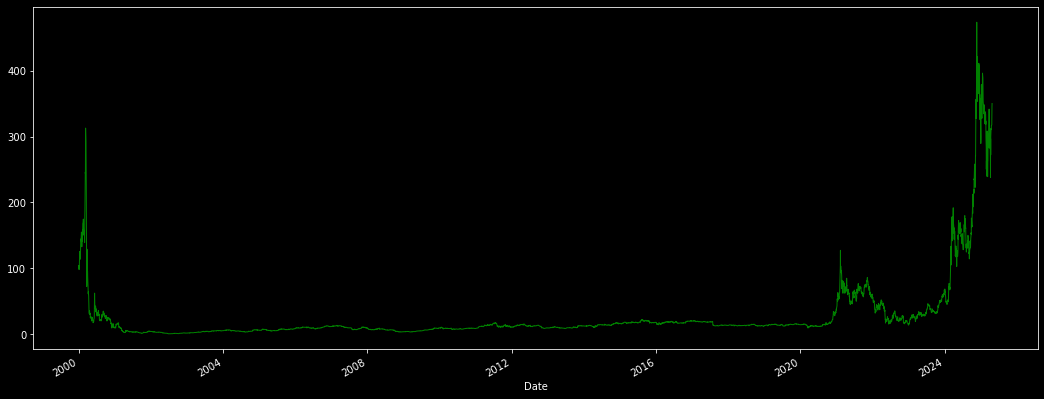

In [38]:
df.Close.plot(figsize=(18,7), linewidth=1, c='g')

# Get returns

<AxesSubplot:xlabel='Date'>

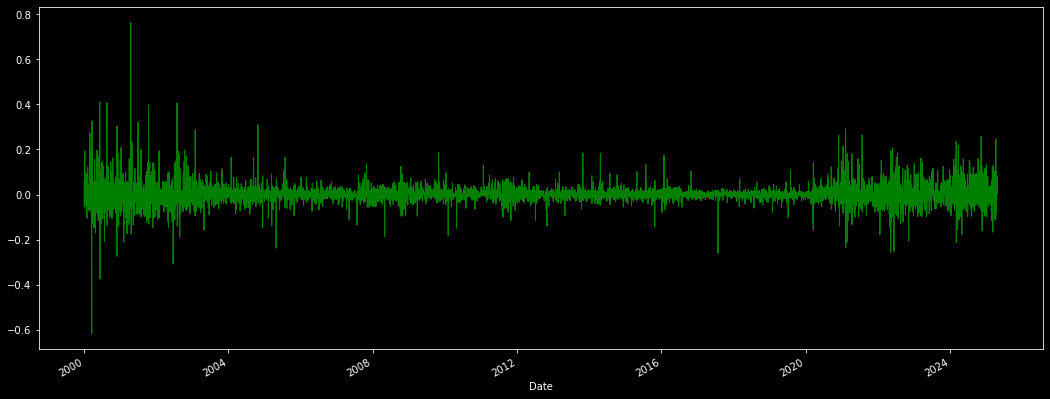

In [78]:
returns = df.Close.pct_change(periods=1).dropna()

returns.plot(figsize=(18,7), linewidth=1, c='g')
#returns.rolling(window=5*4*2).std().plot(c='r')